<a href="https://colab.research.google.com/github/shrimogle/Machine-Learning/blob/main/SEM_5_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Shrinivas Dnyanoba Mogle

PRN: RBT21CB014

Lab Assignment 1: Build an ANN Model on Churn Modelling Dataset



Importing Required **Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid",font_scale=1.5)
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder ,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,BatchNormalization,Dense,Activation



Loading **Data**

In [ ]:
df = pd.read_csv('Churn_Modelling_dataset.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Basic Understanding Of **Data**

In [ ]:
print("Total number of Observations present in the dataset is:",df.shape[0])
print("Total number of Features present in the dataset is:",df.shape[1])

Total number of Observations present in the dataset is: 10000
Total number of Features present in the dataset is: 14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe().style.background_gradient(cmap='Oranges')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.500000,15690940.569400,650.528800,38.921800,5.012800,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203700
std,2886.895680,71936.186123,96.653299,10.487806,2.892174,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402769
min,1.000000,15565701.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.750000,15628528.250000,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,5000.500000,15690738.000000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,7500.250000,15753233.750000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,10000.000000,15815690.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull().sum().to_frame().rename(columns={0:'Total Num of Missing Values'})


,Total Num of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.duplicated().any()

False

In [ ]:
df.describe(include='O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


Dropping Insignificant **Features**

In [ ]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2134,2135,15610355,Hunter,713,France,Male,44,1,63438.91,1,1,0,64375.40,0
1483,1484,15790683,Matthews,850,France,Male,36,1,104077.19,2,0,1,68594.00,0
6436,6437,15723216,Greco,623,Germany,Male,33,2,80002.33,1,1,1,104079.62,0
2089,2090,15608886,Okwudiliolisa,679,France,Female,33,1,0.00,2,0,0,69608.48,0
4988,4989,15775067,Fang,606,France,Male,47,3,93578.68,2,0,1,137720.56,1


In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'] , inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.rename(columns={'Exited':'Churned'},inplace=True)
df["Churned"].replace({0:"No",1:"Yes"},inplace=True)


In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


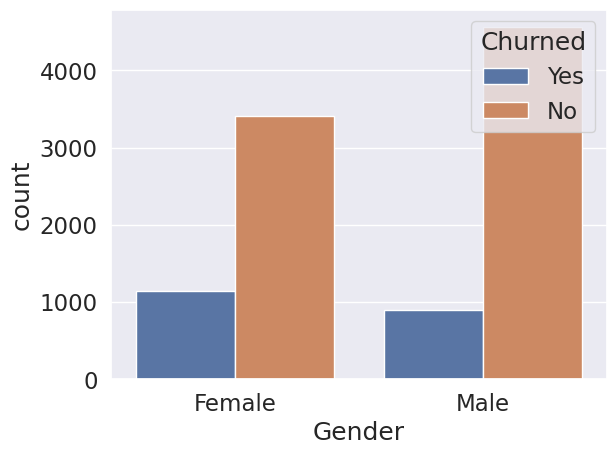

In [ ]:
sns.countplot(x ='Gender', data = df, hue = 'Churned')
plt.show()

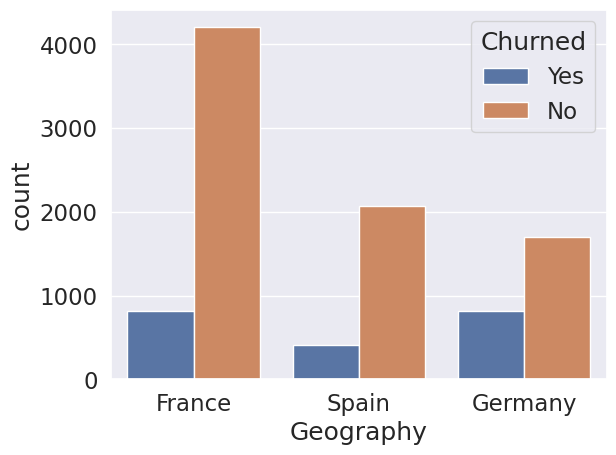

In [ ]:
sns.countplot(x ='Geography', data = df , hue = 'Churned')
plt.show()

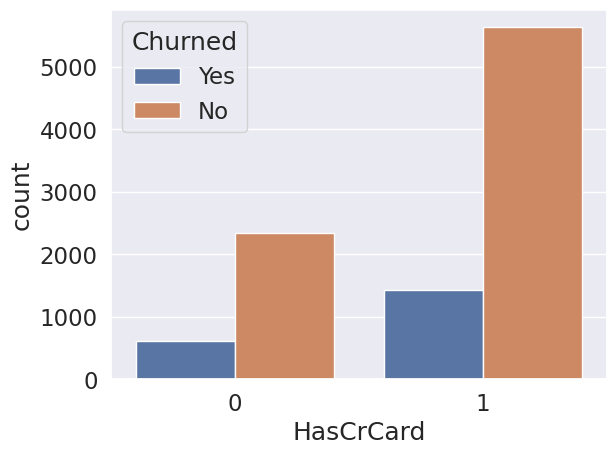

In [ ]:
sns.countplot(x ='HasCrCard', data = df , hue = 'Churned')
plt.show()

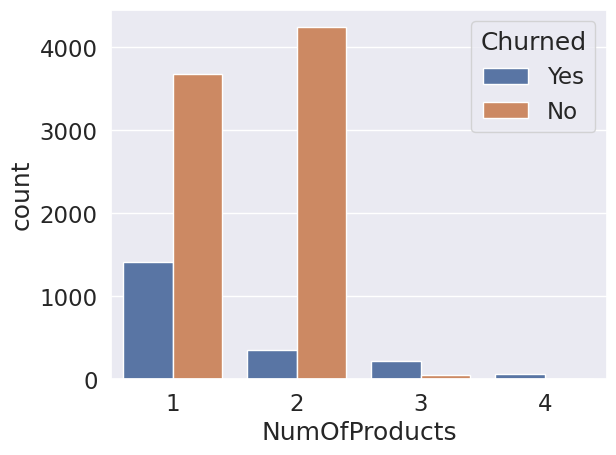

In [ ]:
sns.countplot(x ='NumOfProducts', data = df , hue = 'Churned')
plt.show()

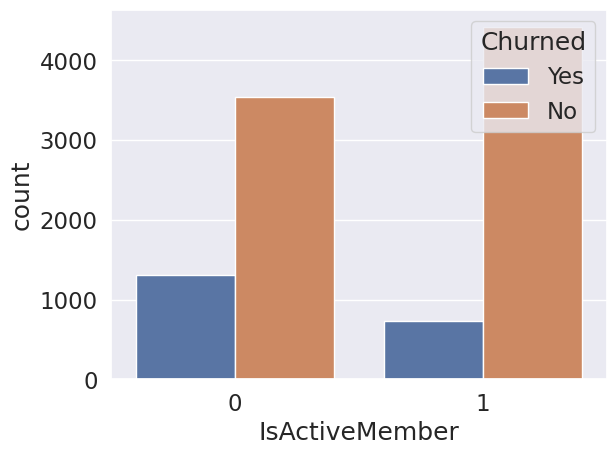

In [ ]:
sns.countplot(x ='IsActiveMember', data = df , hue = 'Churned')
plt.show()

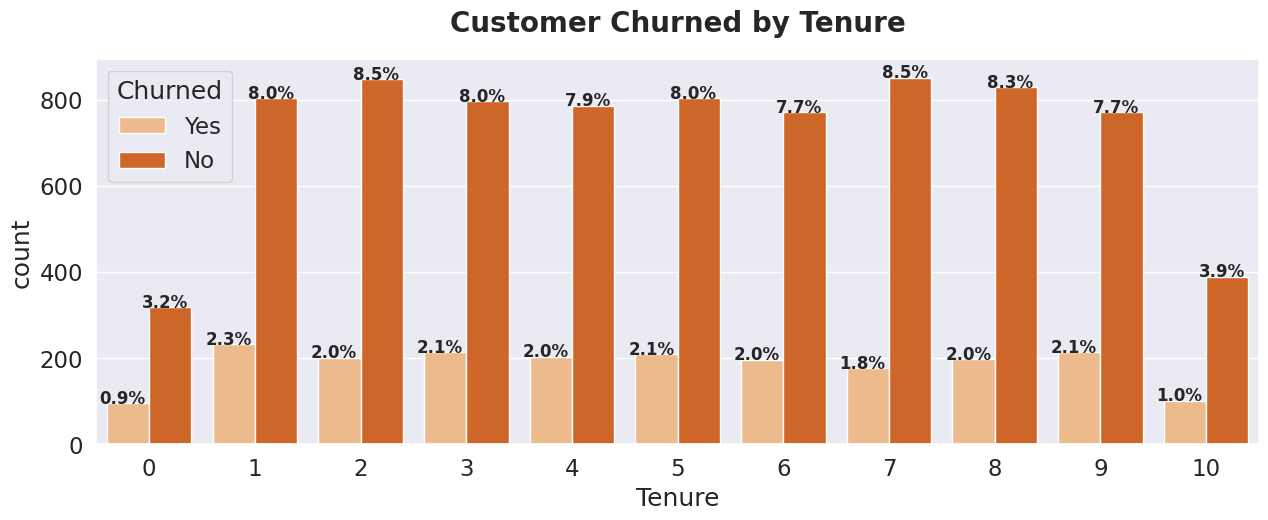

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="Tenure", data=df, hue="Churned",palette="Oranges")
for value in ax.patches:
    percentage = "{:.1f}%".format(100*value.get_height()/len(df["Tenure"]))
    x = value.get_x() + value.get_width() / 2 - 0.05
    y = value.get_y() + value.get_height()
    ax.annotate(percentage, (x,y), fontweight="black",size=12, ha="center")

plt.title("Customer Churned by Tenure",fontweight="black",size=20,pad=20)
plt.show()

In [ ]:
encoder = OneHotEncoder()

columns_to_encode = ['Geography', 'Gender']

encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(df[columns_to_encode])

encoded_column_names = []
for i, column in enumerate(columns_to_encode):
    categories = encoder.categories_[i]
    encoded_column_names.extend([column + '_' + str(category) for category in categories])

df.drop(columns_to_encode, axis=1, inplace=True)
df[encoded_column_names] = encoded_columns

le = LabelEncoder()

df["Churned"] = le.fit_transform(df["Churned"])

df.head()



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0


In [ ]:
cols = ["CreditScore","Age","EstimatedSalary","Balance"]

df[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})



,Feature Skewness
CreditScore,-0.071607
Age,1.011320
EstimatedSalary,0.002085
Balance,-0.141109


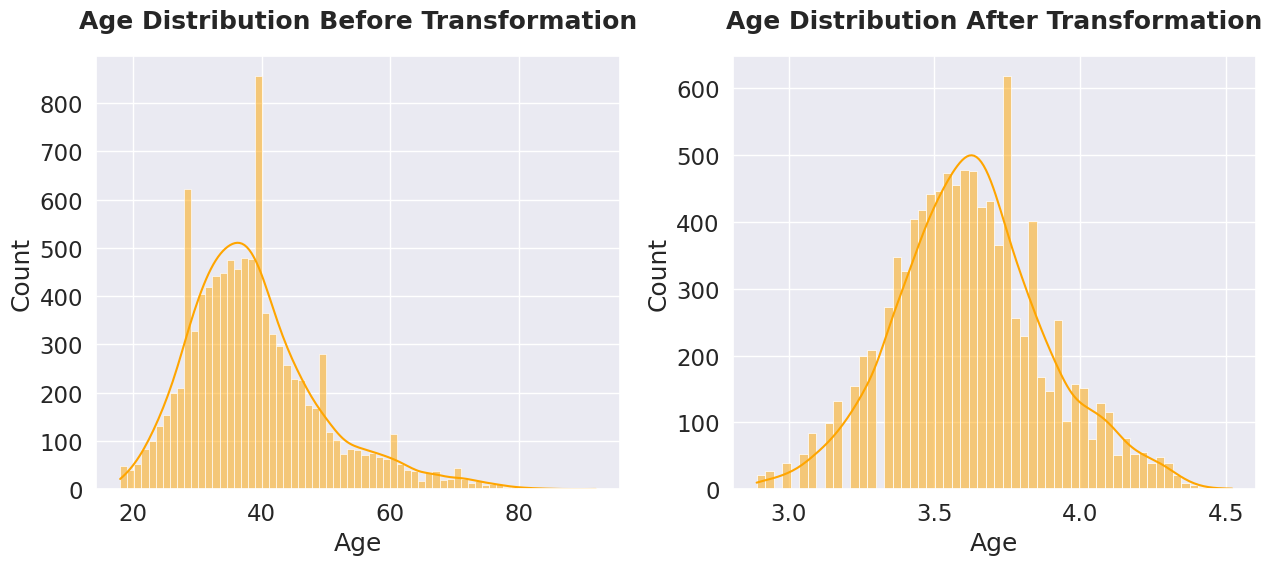

In [ ]:
old_age = df["Age"]

df["Age"] = np.log(df["Age"])

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(old_age, color="orange", kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
sns.histplot(df["Age"], color="orange", kde=True)
plt.title("Age Distribution After Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()



In [ ]:
sc1=StandardScaler()
sc2=StandardScaler()
sc3=StandardScaler()
sc4=StandardScaler()

df["CreditScore"] = sc1.fit_transform(df[["CreditScore"]])
df["Age"] = sc2.fit_transform(df[["Age"]])
df["Balance"] = sc3.fit_transform(df[["Balance"]])
df["EstimatedSalary"] = sc4.fit_transform(df[["EstimatedSalary"]])

df.head()



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.425883,2,-1.225848,1,1,1,0.021886,1,1.0,0.0,0.0,1.0,0.0
1,-0.440036,0.332621,1,0.117350,1,0,1,0.216534,0,0.0,0.0,1.0,1.0,0.0
2,-1.536794,0.425883,8,1.333053,3,1,0,0.240687,1,1.0,0.0,0.0,1.0,0.0
3,0.501521,0.139072,1,-1.225848,2,0,0,-0.108918,0,1.0,0.0,0.0,1.0,0.0
4,2.063884,0.516950,2,0.785728,1,1,1,-0.365276,0,0.0,0.0,1.0,1.0,0.0


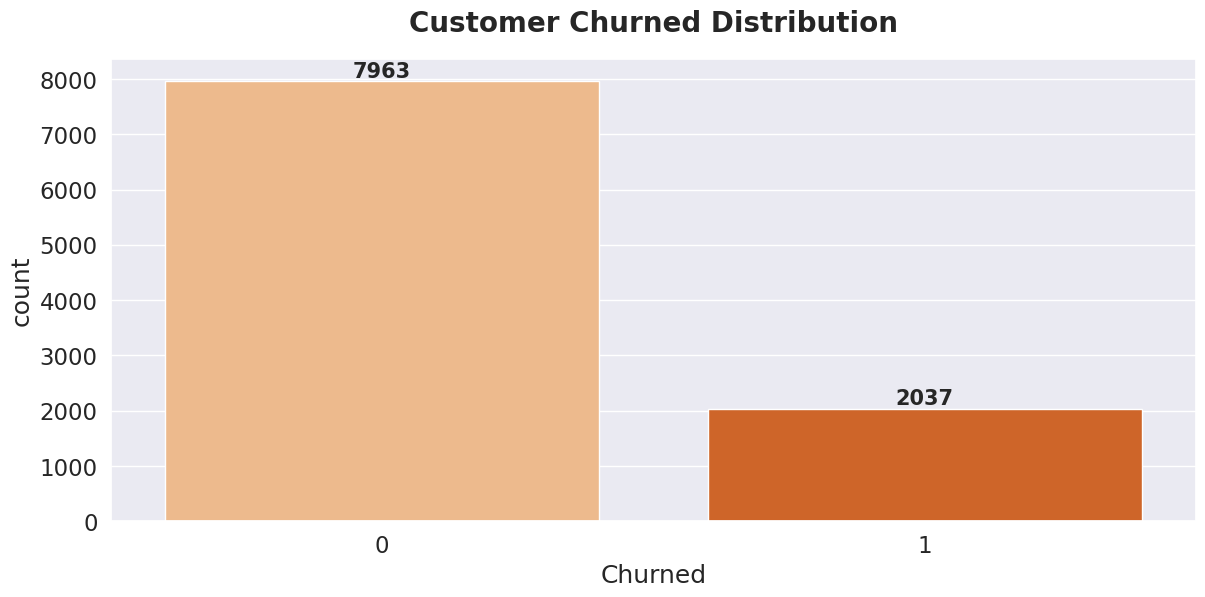

In [ ]:
X = df.drop(columns=["Churned"] , axis=1 )
y = df["Churned"]

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

plt.figure(figsize=(14, 6))
ax = sns.countplot(data=df, x='Churned', palette='Oranges')
ax.bar_label(ax.containers[0], fontweight='black', size=15)
plt.title('Customer Churned Distribution', fontweight='black', size=20, pad=20)

plt.show()



In [ ]:
under_sampler = RandomUnderSampler(random_state=42)

x_train_under, y_train_under = under_sampler.fit_resample(x_train, y_train)

print("Class distribution after under-sampling:")
print(Counter(y_train_under))



Class distribution after under-sampling:
Counter({0: 1644, 1: 1644})


In [ ]:
model=Sequential()

model.add(Dense(units=30, activation='relu', kernel_initializer='he_normal'))

# Hidden Layers
model.add(Dense(units=300, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(units=100, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(units=50, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Output Layer
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy', metrics='accuracy')

model.fit(x=x_train,y=y_train,epochs=200,validation_data=(x_test,y_test))



Epoch 1/200
250/250 [==============================] - 4s 7ms/step - loss: 0.6203 - accuracy: 0.6942 - val_loss: 0.4479 - val_accuracy: 0.8055
Epoch 2/200
250/250 [==============================] - 2s 8ms/step - loss: 0.4918 - accuracy: 0.7843 - val_loss: 0.4195 - val_accuracy: 0.8190
Epoch 3/200
250/250 [==============================] - 2s 8ms/step - loss: 0.4697 - accuracy: 0.7875 - val_loss: 0.4103 - val_accuracy: 0.8250
Epoch 4/200
250/250 [==============================] - 1s 5ms/step - loss: 0.4417 - accuracy: 0.8029 - val_loss: 0.4001 - val_accuracy: 0.8290
Epoch 5/200
250/250 [==============================] - 1s 5ms/step - loss: 0.4266 - accuracy: 0.8138 - val_loss: 0.3964 - val_accuracy: 0.8315
Epoch 6/200
250/250 [==============================] - 1s 4ms/step - loss: 0.4264 - accuracy: 0.8123 - val_loss: 0.3897 - val_accuracy: 0.8345
Epoch 7/200
250/250 [==============================] - 1s 4ms/step - loss: 0.4135 - accuracy: 0.8240 - val_loss: 0.3837 - val_accuracy: 0.8320

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 300)               9300      
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 batch_normalization (Batch  (None, 300)               1200      
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                        

In [ ]:
model_loss=pd.DataFrame(model.history.history)

model_loss.head()



,loss,accuracy,val_loss,val_accuracy
0,0.620290,0.694250,0.447873,0.8055
1,0.491844,0.784250,0.419492,0.8190
2,0.469706,0.787500,0.410300,0.8250
3,0.441749,0.802875,0.400070,0.8290
4,0.426569,0.813750,0.396411,0.8315


<Axes: >

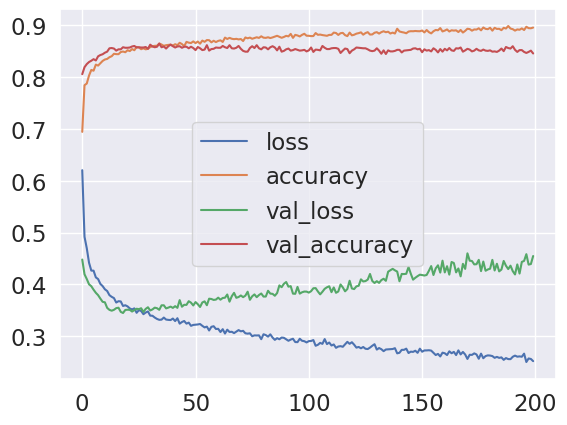

In [ ]:
model_loss.plot()

<Axes: >

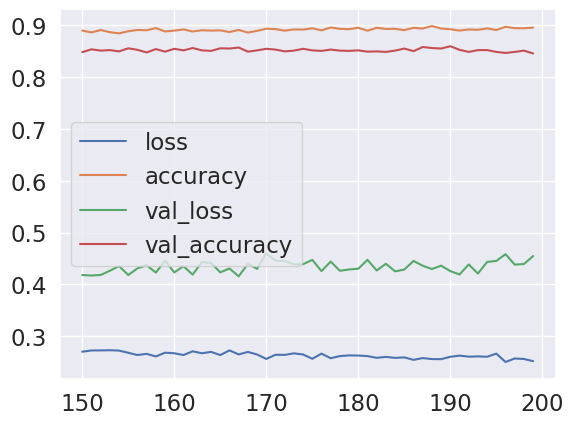

In [ ]:
model_loss.tail(50).plot()


In [ ]:
predictions=model.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [ ]:
ypred= (model.predict(x_test) > 0.5).astype("int32")

63/63 [==============================] - 0s 3ms/step


In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1607
           1       0.66      0.44      0.53       393

    accuracy                           0.85      2000
   macro avg       0.77      0.69      0.72      2000
weighted avg       0.83      0.85      0.83      2000

